<a href="https://colab.research.google.com/github/ZhizhchenkoA/Mechanic_Project/blob/main/Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
mu = 0.2
def f(x, y):
  r1 = ((x + mu) ** 2 + y ** 2) ** 0.5
  r2 = ((x - 1 + mu) ** 2 + y ** 2) ** 0.5
  return (x ** 2 + y ** 2) / 2 + (1 - mu) / r1 + mu / r2 + ((1 - mu) * mu) / 2

100%|██████████| 300/300 [00:01<00:00, 179.17it/s]


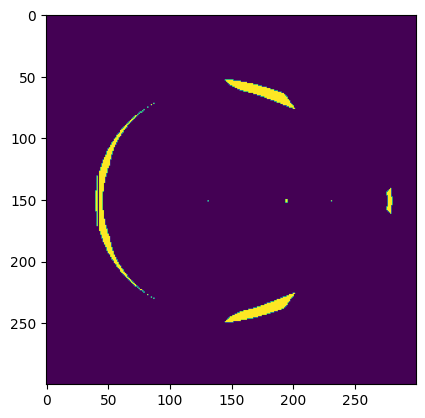

In [3]:
lim_x_min, lim_x_max = -1.5, 1.5
step_x = 0.01
lim_y_min, lim_y_max = -1.5, 1.5
step_y = 0.01
mx = np.arange(lim_x_min, lim_x_max, step_x)
my = np.arange(lim_y_min, lim_y_max, step_y)
ans_x, ans_y = np.array([]), np.array([])
xg, yg = [], []
epsilon = 1e-6
for x in tqdm(mx):
  for y in my:
    if (f(x, y) - f(x - step_x, y)) * (f(x + step_x, y) - f(x, y)) < epsilon and \
     (f(x, y) - f(x, y - step_y)) * (f(x, y + step_y) - f(x, y)) < epsilon:
        ans_x = np.append(ans_x, x)
        ans_y = np.append(ans_y, y)
        xg.append(int((lim_x_min + x) * (1 / step_x)))
        yg.append(int((lim_y_min + y) * (1 / step_y)))
k = int((lim_x_max - lim_x_min) / step_x)
arr = np.zeros((k, k))
arr[yg, xg] = 1
plt.imshow(arr)
plt.show()

In [4]:
def diff_u_x(x, y):
  delta = 0.00001
  return (f(x + delta, y) - f(x, y)) / delta

def diff_u_y(x, y):
  delta = 0.00001
  return (f(x, y + delta) - f(x, y)) / delta

def x_dot(x, y, px, py):
  return px + y

def y_dot(x, y, px, py):
  return py - x

def px_dot(x, y, px, py):
  return py - x + diff_u_x(x, y)

def py_dot(x, y, px, py):
  return -px - y + diff_u_y(x, y)

In [11]:
x = 0
y = 0
px = 0
py = 0
delta_t = 0.0001
t_number = 1000000
X, Y, PX, PY = [x], [y], [px], [py]
for _ in range(t_number):
  X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
  Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
  PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
  PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
  x = X[-1]
  y = Y[-1]
  px = PX[-1]
  py = PY[-1]


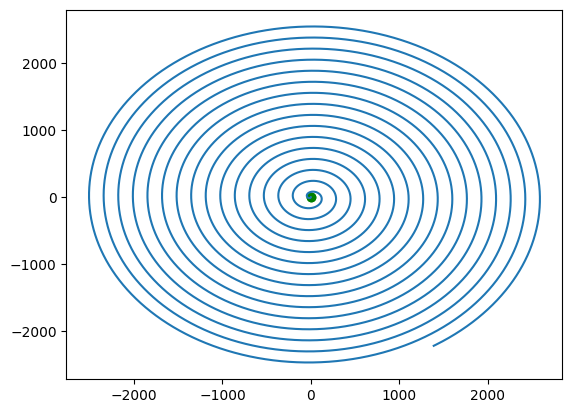

In [12]:
plt.scatter([-mu, 1 - mu], [0, 0], c='green')
plt.plot(X, Y)
plt.show()